In [21]:
import numpy as np

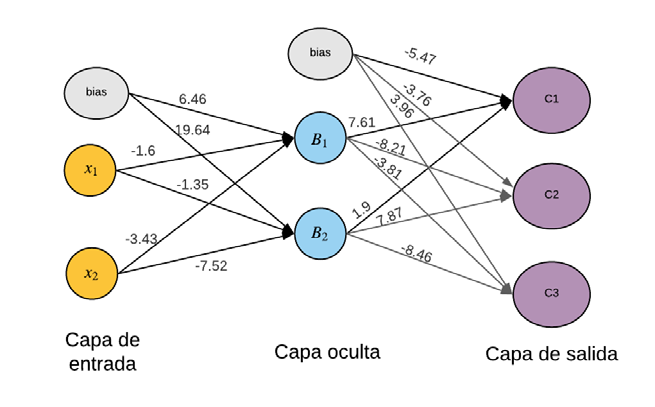


Se pide hallar:
1. Hallar las predicciones del modelo para el siguiente conjunto de test.
2. Evaluar el rendimiento del clasificador en dicho conjunto.

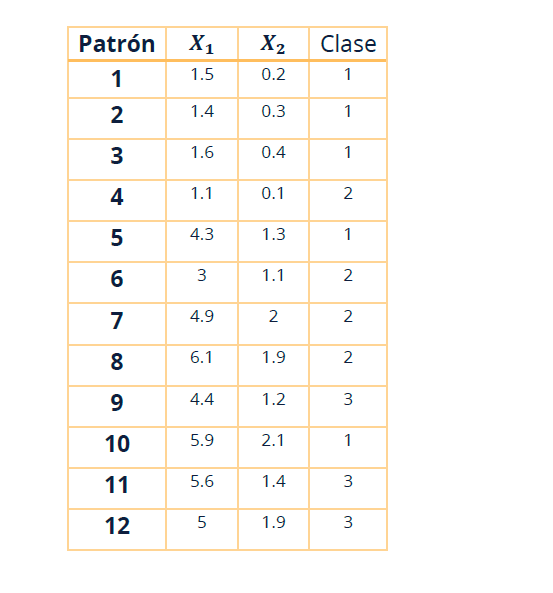

In [22]:


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def calc_z(input_layer, weights):
    return np.array([weights[0] + np.dot(input_layer, weights[1:]) for input_layer in input_layer])
# Hidden layer
hidden_layer_weights = np.array([
    [6.46, -1.6, -3.43],
    [19.64, -1.35, -7.52]
])
# Output layer
output_layer_weights = np.array([
    [-5.47, 7.61, 1.9],
    [-3.76, -8.21, 7.87],
    [3.96, -3.81, -8.46]
])

# Input layer
input_layer = [
    [1.5, 0.2], [1.4, 0.3], [1.6, 0.4], [1.1, 0.1],
    [4.3, 1.3], [3, 1.1], [4.9, 2], [6.1, 1.9],
    [4.4, 1.2], [5.9, 2.1], [5.6, 1.4], [5, 1.9]
]


# Calculate activations
z_hidden = [calc_z(input_layer, weights) for weights in hidden_layer_weights]
# Apply Sigmoid
b_hidden = np.array([sigmoid(z) for z in z_hidden]).T

z_output = [calc_z(b_hidden, weights) for weights in output_layer_weights]
#Apply Sigmoid
C_output = np.array([sigmoid(z) for z in z_output]).T
    


In [24]:
result_class = np.argmax(C_output, axis=1) + 1

real_class = [1, 1, 1, 2, 1, 2, 2, 2, 3, 1, 3, 3]
class_matrix = np.array([real_class, result_class]).T

print(class_matrix)


#Evaluar el rendimiento del clasificador en dicho conjunto.

# confusion matrix 
confusion_matrix = np.zeros((3,3))
for i,_ in enumerate(class_matrix):
    confusion_matrix[class_matrix[i][0]-1][class_matrix[i][1]-1] += 1
print(confusion_matrix)


accuracy = round(np.trace(confusion_matrix) / np.sum(confusion_matrix), 2)
print(f"Accuracy: {accuracy*100}%")





[[1 1]
 [1 1]
 [1 1]
 [2 1]
 [1 2]
 [2 2]
 [2 3]
 [2 3]
 [3 2]
 [1 3]
 [3 2]
 [3 3]]
[[3. 1. 1.]
 [1. 1. 2.]
 [0. 2. 1.]]
Accuracy: 42.0%
